# **🦠 Exploratory Data Analysis Report: Global COVID-19 Excess Deaths**

## **Name:** Pratham Agrawal  
## **PRN:** 22070521078


## **Introduction**

This report presents a detailed **Exploratory Data Analysis (EDA)** on the "Global Excess Deaths Associated with COVID-19" dataset provided by the **World Health Organization (WHO)**. The primary objective of this analysis is to uncover key patterns, trends, and insights from the data.

The process involves:

- **Data Cleaning and Preprocessing**: Ensuring the data is accurate, consistent, and ready for analysis.
- **Exploratory Data Analysis**: Using statistical summaries and visualizations to explore the data from various angles.

This initial analysis forms the foundation for subsequent **machine learning modeling**.

Authentic Dataset Link: https://www.who.int/data/sets/global-excess-deaths-associated-with-covid-19-modelled-estimates

## **Part 1: Data Cleaning, Preprocessing (ETL), and Exploratory Data Analysis**

### **1. SETUP: IMPORTING NECESSARY LIBRARIES**

In [ ]:
# We start by importing the libraries we'll need for this analysis.
# - pandas: The primary tool for data manipulation and loading data.
# - matplotlib.pyplot & seaborn: Powerful libraries for creating visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("Libraries imported successfully.")

Libraries imported successfully.


### **2. DATA LOADING (EXTRACT)**

In [ ]:
# We load the dataset from the .xlsx file. It's crucial to handle potential
# errors like the file not being found.
# We specify 'header=10' because the file contains introductory text, and the
# actual data table headers start on the 11th row (index 10).

file_path = 'WHO_COVID_Excess_Deaths_Estimates_By_Countries.xlsx'
try:
    df_raw = pd.read_excel(file_path, header=10)
    print("Dataset loaded successfully from Excel file, skipping initial rows.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred during file loading: {e}")
    exit()

Dataset loaded successfully from Excel file, skipping initial rows.


### **3. INITIAL DATA EXPLORATION**
Before cleaning, an initial exploration was conducted to understand the structure and content of the raw dataset.

- **Dataset Structure**: The `head()` function revealed the column names and the type of data in each row, showing columns like `country`, `year`, `sex`, `age_group`, and `excess.mean*`.

- **Data Types and Null Values**: The `info()` method provided a summary, showing that the dataset contained **6,210 entries**. It highlighted that columns like `country` and `iso3` had a few missing values and that the `year` column was incorrectly typed as a `float64`.

- **Statistical Summary**: A descriptive statistics summary using `describe()` was generated to understand the distribution of numerical data, including the **mean**, **standard deviation**, and **range** of values for columns like `excess.mean*`.

In [ ]:
# Before cleaning, we must understand the raw data. This step helps us identify
# issues like incorrect column names, missing values, and wrong data types.
print("\n--- Section 3: Initial Data Exploration ---")


--- Section 3: Initial Data Exploration ---


In [ ]:
# Display the first 5 rows to get a feel for the data's structure and content.
print("\n[3.1] First 5 Rows of the Raw Dataset:")
print(df_raw.head())


[3.1] First 5 Rows of the Raw Dataset:
       country iso3    year     sex age_group       type  expected.mean  \
0  Afghanistan  AFG  2020.0  Female      0-24  predicted   49083.643934   
1  Afghanistan  AFG  2020.0  Female     25-34  predicted    6452.967039   
2  Afghanistan  AFG  2020.0  Female     35-44  predicted    6117.873106   
3  Afghanistan  AFG  2020.0  Female     45-54  predicted    7711.689531   
4  Afghanistan  AFG  2020.0  Female     55-64  predicted   10061.544157   

       acm.mean  excess.mean*  
0  49103.143153      0.000000  
1   6691.247219    236.607817  
2   6977.363939    860.300714  
3   9330.217317   1621.571806  
4  12457.985086   2401.488971  


In [ ]:
# Get a concise summary of the DataFrame. This is crucial for checking data types and non-null counts.
print("\n[3.2] Raw Dataset Info:")
df_raw.info()


[3.2] Raw Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6210 entries, 0 to 6209
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        6209 non-null   object 
 1   iso3           6208 non-null   object 
 2   year           6208 non-null   float64
 3   sex            6208 non-null   object 
 4   age_group      6208 non-null   object 
 5   type           6208 non-null   object 
 6   expected.mean  6208 non-null   float64
 7   acm.mean       6208 non-null   float64
 8   excess.mean*   6208 non-null   float64
dtypes: float64(4), object(5)
memory usage: 436.8+ KB


In [ ]:
# Get descriptive statistics for the numerical columns. This helps spot anomalies or outliers.
print("\n[3.3] Descriptive Statistics of Raw Dataset:")
print(df_raw.describe())


[3.3] Descriptive Statistics of Raw Dataset:
             year  expected.mean      acm.mean   excess.mean*
count  6208.00000   6.208000e+03  6.208000e+03    6208.000000
mean   2020.50000   1.799803e+04  2.040344e+04    2394.150624
std       0.50004   8.125499e+04  9.111096e+04   17719.920198
min    2020.00000   8.997246e-03  1.999991e-04 -100092.284796
25%    2020.00000   3.706661e+02  4.110793e+02       0.000000
50%    2020.50000   2.437702e+03  2.719584e+03      84.364682
75%    2021.00000   9.056356e+03  1.044022e+04     799.565654
max    2021.00000   1.578937e+06  1.733563e+06  588930.669756


### **4. DATA CLEANING & PREPROCESSING (TRANSFORM)**
To ensure the quality and reliability of the analysis, the following data cleaning and preprocessing steps were performed on a copy of the raw dataset:


#### **4.1. Standardization of Column Names**

The original column names contained inconsistencies such as capital letters, spaces, and special characters (e.g., `excess.mean*`). To facilitate easier data access and manipulation, all column names were standardized:

- Converted to **lowercase**
- Replaced spaces with **underscores** (`_`)
- Removed **special characters** like `.` and `*`

For example, the column `excess.mean*` was renamed to `excessmean`.


In [ ]:
# In this section, we clean the data to make it reliable for analysis. We create
# a copy of the raw data to ensure the original data remains unchanged.
print("\n--- Section 4: Data Cleaning and Preprocessing ---")
df = df_raw.copy()


--- Section 4: Data Cleaning and Preprocessing ---


In [ ]:
# We convert all column names to lowercase and remove spaces, periods, and asterisks.
# This makes accessing columns much easier and less error-prone.
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '', regex=False).str.replace('*', '', regex=False)
print("\n[4.1] Column names standardized.")
print("New columns:", df.columns.tolist())


[4.1] Column names standardized.
New columns: ['country', 'iso3', 'year', 'sex', 'age_group', 'type', 'expectedmean', 'acmmean', 'excessmean']



#### **4.2. Handling of Missing Values**

The dataset was inspected for missing values. It was determined that rows with missing data in the `excessmean`, `country`, or `year` columns were not suitable for this analysis and were therefore **dropped**.

In [ ]:
# We remove rows where essential data ('excessmean', 'country', 'year') is missing,
# as these rows are not useful for our analysis.
df.dropna(subset=['excessmean', 'country', 'year'], inplace=True)
print("\n[4.2] Rows with critical missing values have been dropped.")


[4.2] Rows with critical missing values have been dropped.


#### **4.3. Correction of Data Types**

The `year` column was initially loaded as a **floating-point number** (e.g., `2020.0`). To enable accurate grouping and analysis by year, this column's data type was converted to an **integer** (e.g., `2020`).

In [ ]:
# The 'year' column was loaded as a float (e.g., 2020.0). We convert it to an integer.
df['year'] = df['year'].astype(int)
print("\n[4.3] Data types corrected ('year' column converted to integer).")


[4.3] Data types corrected ('year' column converted to integer).


In [ ]:
print(f"\nShape of DataFrame after cleaning: {df.shape}")
print("\n--- Data Cleaning and Preprocessing Complete ---")


Shape of DataFrame after cleaning: (6208, 9)

--- Data Cleaning and Preprocessing Complete ---


### **5. EXPLORATORY DATA ANALYSIS (EDA) WITH VISUALIZATIONS**
After cleaning the data, a deep dive analysis was performed using various visualizations to identify trends and draw insights.


In [ ]:
# Now we explore the cleaned data to uncover patterns, insights, and relationships.
# We set a consistent, clean style for all our plots.
print("\n--- Section 5: Exploratory Data Analysis ---")
sns.set_style("whitegrid")


--- Section 5: Exploratory Data Analysis ---



#### **5.1. Global Excess Deaths Per Year**

**Figure 1**: Bar chart showing total global excess deaths for 2020 and 2021.

**Observation**: The chart clearly shows that the total number of excess deaths was significantly higher in 2021 compared to 2020, indicating a worsening of the pandemic's impact on mortality in the second year.


Generating EDA Plot 5.1: Global Excess Deaths Per Year...


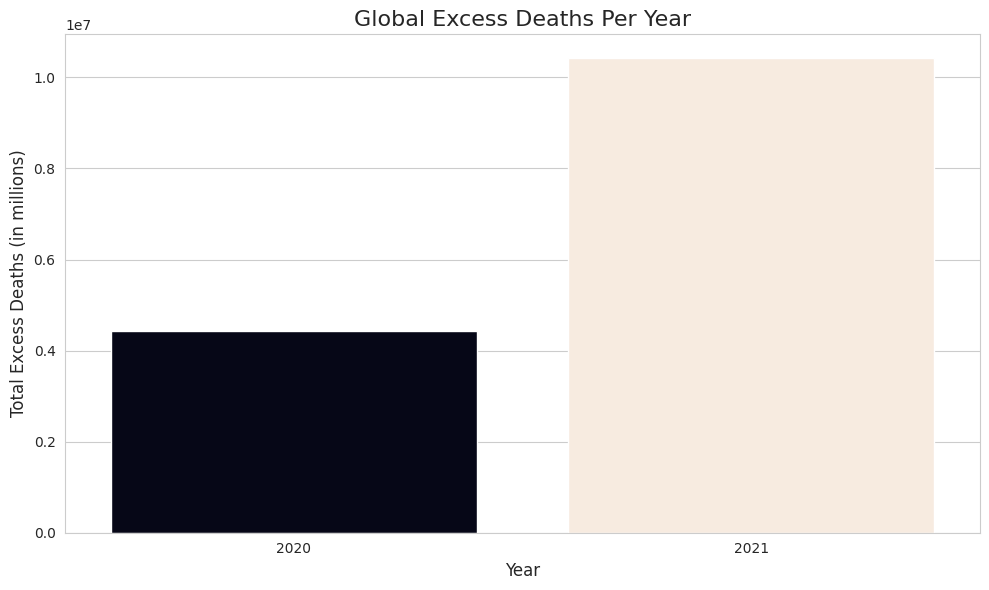

In [ ]:
# EDA 5.1: Global Excess Deaths Per Year
print("\nGenerating EDA Plot 5.1: Global Excess Deaths Per Year...")
global_deaths_per_year = df.groupby('year')['excessmean'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=global_deaths_per_year.index, y=global_deaths_per_year.values, palette='rocket', hue=global_deaths_per_year.index, legend=False)
plt.title('Global Excess Deaths Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Excess Deaths (in millions)', fontsize=12)
plt.tight_layout()
plt.savefig('global_deaths_per_year.png')
plt.show()


#### **5.2. Top 15 Countries by Total Excess Deaths**

**Figure 2**: Horizontal bar chart showing the 15 countries with the highest cumulative excess deaths.

**Observation**: This visualization highlights the countries most affected by the pandemic in terms of absolute excess mortality. Countries like **India, Russia, Indonesia, and the USA** appear at the top, showing the immense scale of the pandemic in these nations.


Generating EDA Plot 5.2: Top 15 Countries by Total Excess Deaths...


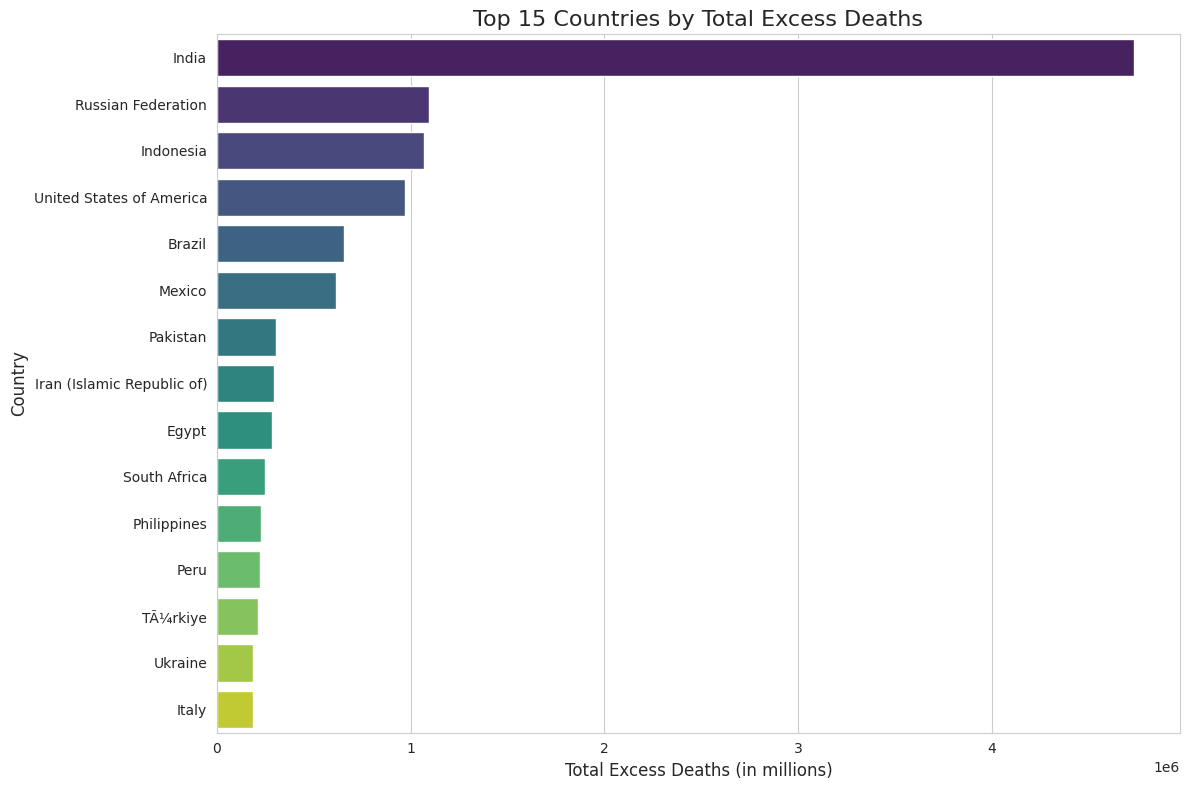

In [ ]:
# EDA 5.2: Top 15 Countries by Total Excess Deaths
print("\nGenerating EDA Plot 5.2: Top 15 Countries by Total Excess Deaths...")
total_deaths_by_country = df.groupby('country')['excessmean'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=total_deaths_by_country.head(15).values, y=total_deaths_by_country.head(15).index, palette='viridis', hue=total_deaths_by_country.head(15).index, legend=False)
plt.title('Top 15 Countries by Total Excess Deaths', fontsize=16)
plt.xlabel('Total Excess Deaths (in millions)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig('top_15_countries_by_deaths.png')
plt.show()


#### **5.3. Comparison of Excess Deaths by Sex**

**Figure 3**: Bar chart comparing the total excess deaths between males and females.

**Observation**: The analysis indicates that a higher number of excess deaths were recorded for **males** than for **females** globally, suggesting a gender disparity in the pandemic's impact.


Generating EDA Plot 5.3: Comparison of Excess Deaths by Sex...


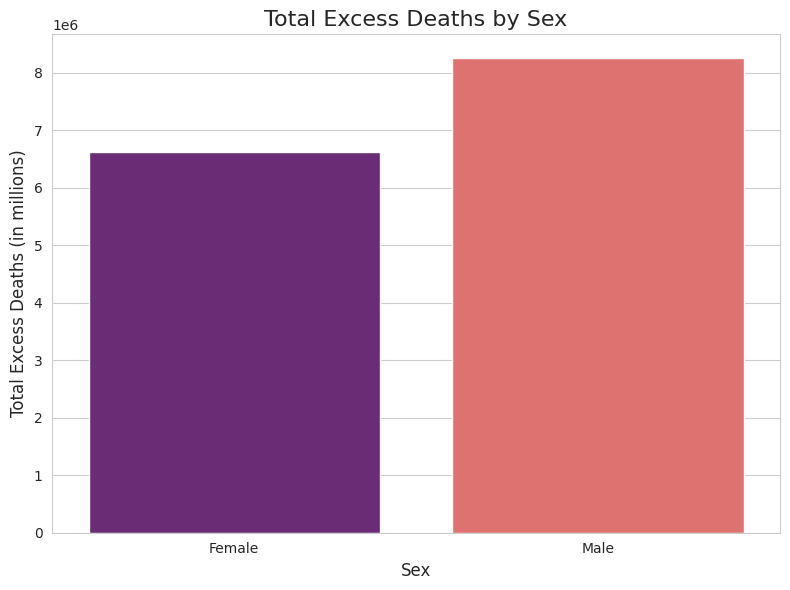

In [ ]:
# EDA 5.3: Comparison of Excess Deaths by Sex
print("\nGenerating EDA Plot 5.3: Comparison of Excess Deaths by Sex...")
df_sex_specific = df[df['sex'].isin(['Male', 'Female'])]
deaths_by_sex_specific = df_sex_specific.groupby('sex')['excessmean'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=deaths_by_sex_specific.index, y=deaths_by_sex_specific.values, palette='magma', hue=deaths_by_sex_specific.index, legend=False)
plt.title('Total Excess Deaths by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Total Excess Deaths (in millions)', fontsize=12)
plt.tight_layout()
plt.savefig('deaths_by_sex.png')
plt.show()


#### **5.4. Distribution of Excess Deaths by Age Group**

**Figure 4**: Bar chart showing the distribution of total excess deaths across different age groups.

**Observation**: There is a clear trend showing that excess deaths **increase significantly with age**. The older age groups, particularly **65+**, account for the vast majority of excess deaths, highlighting their vulnerability.



Generating EDA Plot 5.4: Distribution of Excess Deaths by Age Group...


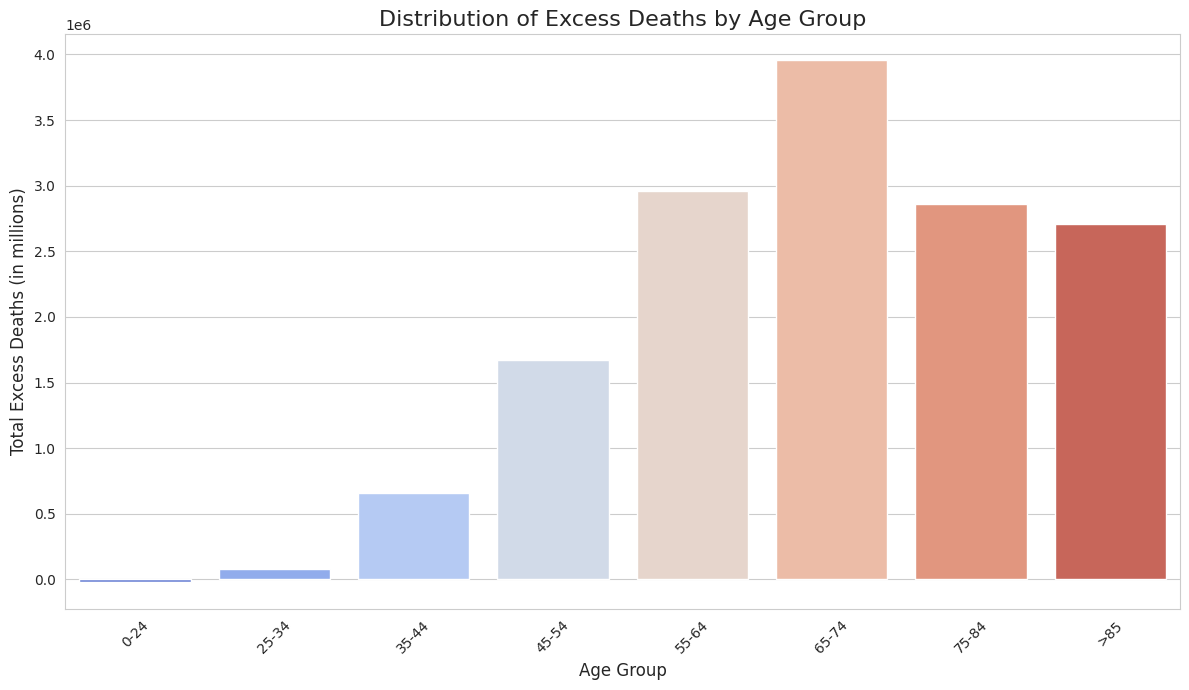

In [ ]:
# EDA 5.4: Distribution of Excess Deaths by Age Group
print("\nGenerating EDA Plot 5.4: Distribution of Excess Deaths by Age Group...")
# We define a specific order for age groups to make the plot logical.
age_order = sorted(df['age_group'].unique(), key=lambda x: int(x.split('-')[0].replace('>', '')))
deaths_by_age = df.groupby('age_group')['excessmean'].sum().reindex(age_order)
plt.figure(figsize=(12, 7))
sns.barplot(x=deaths_by_age.index, y=deaths_by_age.values, palette='coolwarm', hue=deaths_by_age.index, legend=False)
plt.title('Distribution of Excess Deaths by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Excess Deaths (in millions)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('deaths_by_age_group.png')
plt.show()

#### **5.5. Analysis by Estimate Type**

**Figure 5**: Pie chart showing the proportion of data points that were **predicted** vs. **reported**.

**Observation**: The majority of the data points in this dataset are based on **predicted models** rather than officially reported figures. This is important context, indicating that many figures are estimates calculated by the WHO where direct data was unavailable.


Generating EDA Plot 5.5: Analysis by Estimate Type...


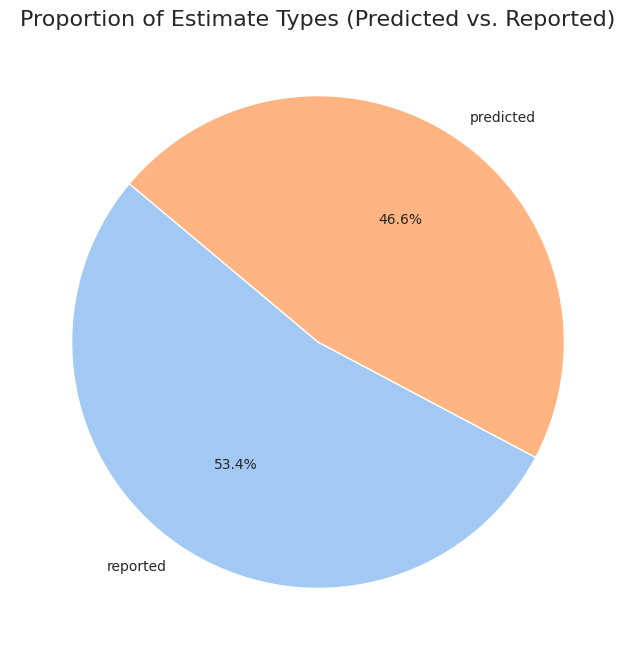

In [ ]:
# EDA 5.5: Analysis by Estimate Type (Predicted vs. Reported)
print("\nGenerating EDA Plot 5.5: Analysis by Estimate Type...")
# This shows how many data points were based on direct reports vs. statistical predictions.
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Estimate Types (Predicted vs. Reported)', fontsize=16)
plt.ylabel('') # Hides the 'type' label on the y-axis for a cleaner look
plt.savefig('estimate_type_proportion.png')
plt.show()


#### **5.6. Heatmap of Excess Deaths for Top 10 Countries**

**Figure 6**: Heatmap comparing excess deaths in 2020 vs. 2021 for the top 10 most affected countries.

**Observation**: The heatmap provides a powerful visual comparison. For most of the top 10 countries, the color intensity is **darker for 2021**, visually confirming that the death toll **rose in the second year** of the pandemic for the hardest-hit nations.


Generating EDA Plot 5.6: Heatmap of Excess Deaths...


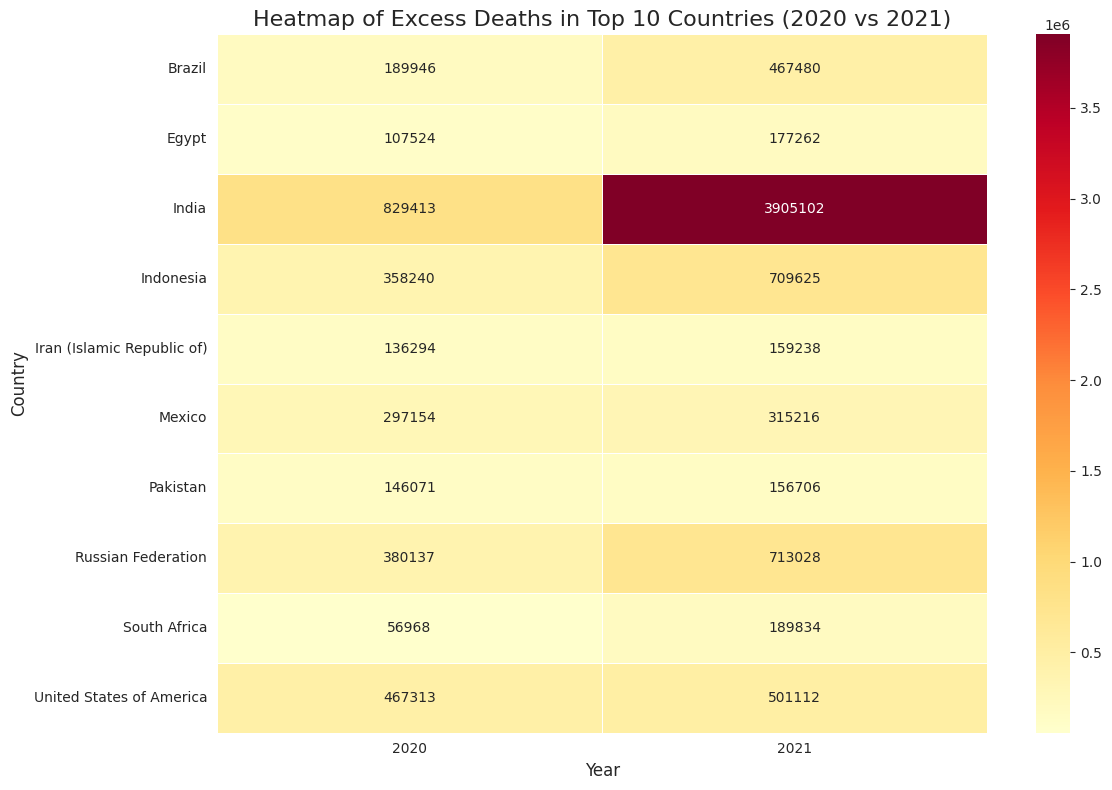

In [ ]:
# EDA 5.6: Heatmap of Excess Deaths for Top 10 Countries Across Years
print("\nGenerating EDA Plot 5.6: Heatmap of Excess Deaths...")
# A heatmap is excellent for visualizing the magnitude of a phenomenon across two categories.
top_10_countries = total_deaths_by_country.head(10).index
df_top10 = df[df['country'].isin(top_10_countries)]
heatmap_data = df_top10.pivot_table(values='excessmean', index='country', columns='year', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=.5)
plt.title('Heatmap of Excess Deaths in Top 10 Countries (2020 vs 2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig('heatmap_top10_countries.png')
plt.show()

#### **5.7. Bottom 15 Countries by Total Excess Deaths**

**Figure 7**: Horizontal bar chart showing the 15 countries with the lowest cumulative excess deaths.

**Observation**: This chart shows countries that, according to the data, had a **minimal number of excess deaths**. This could be due to **effective pandemic management**, **geographical isolation**, or **limitations in data reporting** for those specific nations.



Generating EDA Plot 5.7: Bottom 15 Countries by Total Excess Deaths...


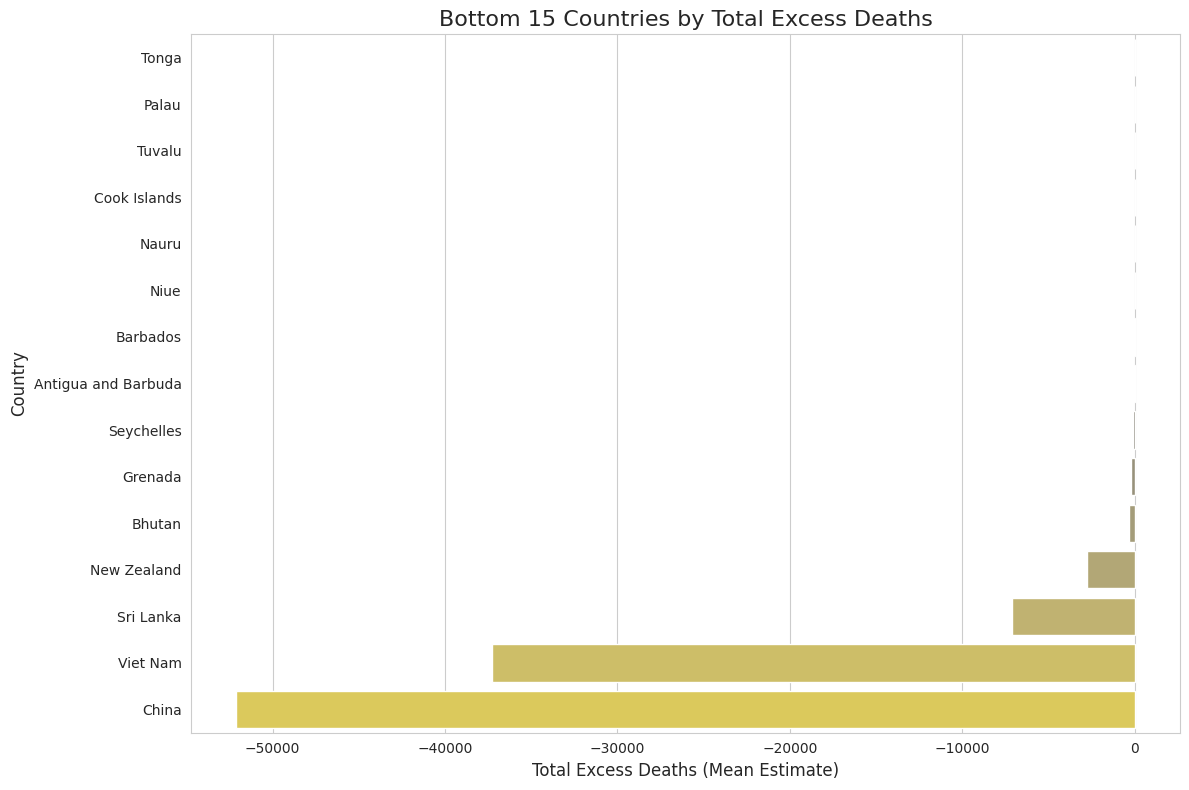

In [ ]:
# EDA 5.7: Bottom 15 Countries by Total Excess Deaths
print("\nGenerating EDA Plot 5.7: Bottom 15 Countries by Total Excess Deaths...")
# This provides a contrast to the top 15, showing countries with the lowest reported/estimated excess deaths.
# We use .tail(15) on the sorted data to get the bottom countries.
plt.figure(figsize=(12, 8))
sns.barplot(x=total_deaths_by_country.tail(15).values, y=total_deaths_by_country.tail(15).index, palette='cividis', hue=total_deaths_by_country.tail(15).index, legend=False)
plt.title('Bottom 15 Countries by Total Excess Deaths', fontsize=16)
plt.xlabel('Total Excess Deaths (Mean Estimate)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig('bottom_15_countries_by_deaths.png')
plt.show()

#### **5.8. Box Plot of Excess Deaths by Year**

**Figure 8**: Box plot showing the distribution of excess death estimates for 2020 and 2021.

**Observation**: The box plot for **2021** is positioned higher and is more spread out than for **2020**. This indicates that not only was the **median excess death** figure higher in 2021, but the **variability and range** of estimates across different entries were also greater. The presence of numerous **outliers (dots)** signifies **extreme values** in certain regions or age groups.



Generating EDA Plot 5.8: Box Plot of Excess Deaths by Year...


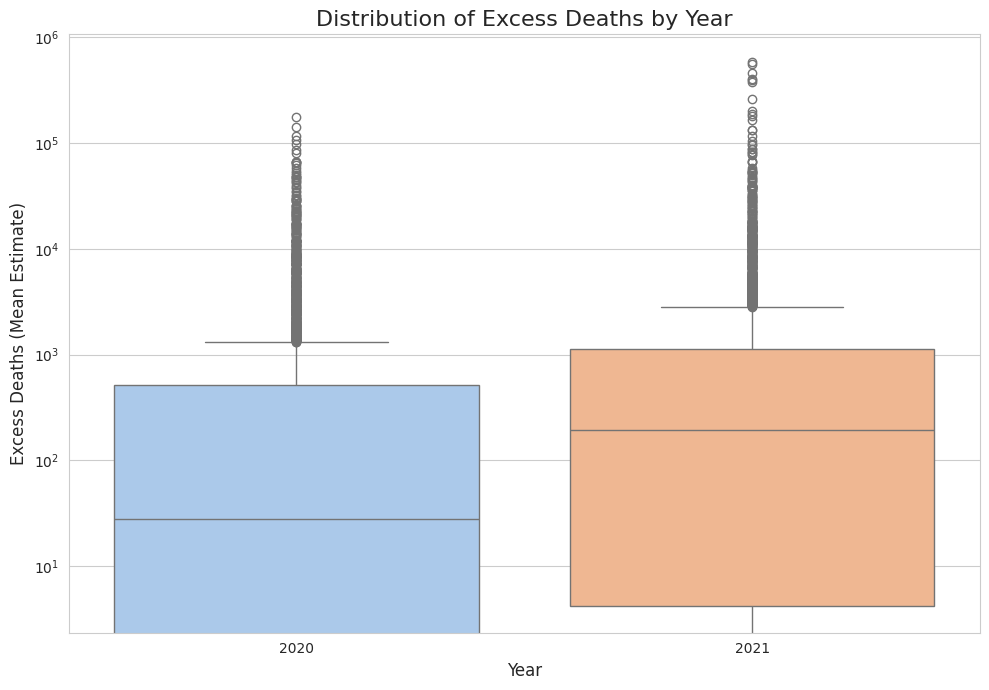

In [ ]:
# EDA 5.8: Box Plot of Excess Deaths by Year
print("\nGenerating EDA Plot 5.8: Box Plot of Excess Deaths by Year...")
# A box plot is excellent for showing the distribution, median, and outliers of the data.
# We are looking at the distribution of the 'excessmean' values for each year.
plt.figure(figsize=(10, 7))
sns.boxplot(x='year', y='excessmean', hue='year', data=df, palette='pastel', legend=False)
plt.title('Distribution of Excess Deaths by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Excess Deaths (Mean Estimate)', fontsize=12)
plt.yscale('log') # Using a log scale to better visualize the distribution due to outliers
plt.tight_layout()
plt.savefig('boxplot_deaths_by_year.png')
plt.show()

#### **5.9. Violin Plot of Excess Deaths by Sex**

**Figure 9**: Violin plot illustrating the distribution of excess death estimates for males and females.

**Observation**: The violin plot for **males** is wider at higher values compared to the plot for **females**. This reinforces the earlier finding that **males experienced a higher number of excess deaths**, and it also shows that the **density of higher-end estimates** is greater for the male population.



Generating EDA Plot 5.9: Violin Plot of Excess Deaths by Sex...


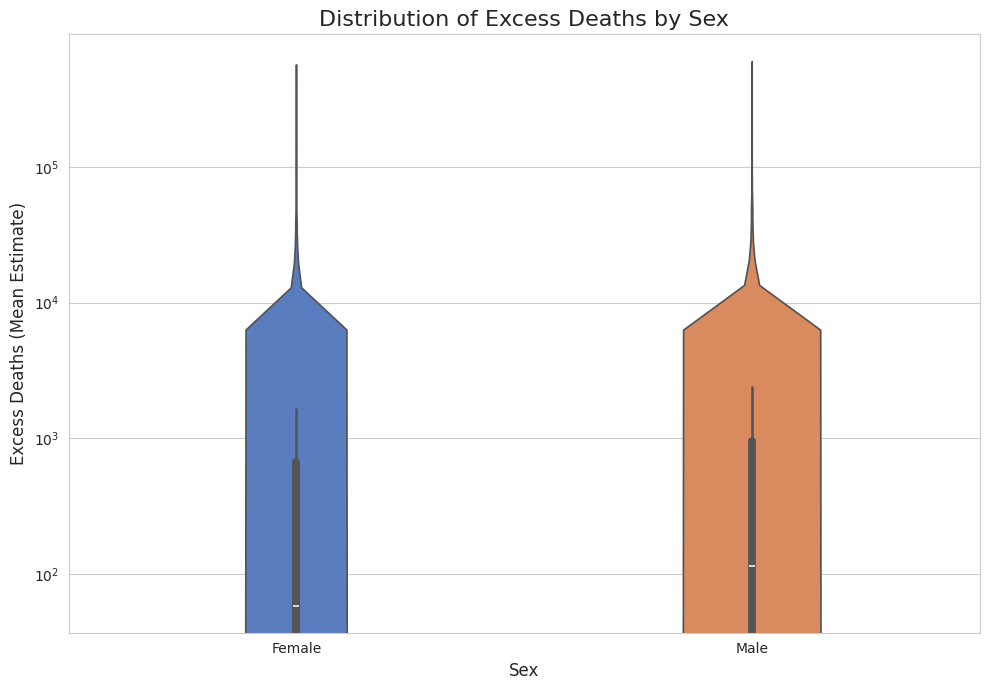

In [ ]:
# EDA 5.9: Violin Plot of Excess Deaths by Sex
print("\nGenerating EDA Plot 5.9: Violin Plot of Excess Deaths by Sex...")
# A violin plot combines a box plot with a kernel density plot, showing the probability density of the data at different values.
plt.figure(figsize=(10, 7))
sns.violinplot(x='sex',y='excessmean',hue='sex',data=df[df['sex'].isin(['Male', 'Female'])],palette='muted', legend=False)
plt.title('Distribution of Excess Deaths by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Excess Deaths (Mean Estimate)', fontsize=12)
plt.yscale('log') # Log scale helps in visualizing wide-ranging data
plt.tight_layout()
plt.savefig('violinplot_deaths_by_sex.png')
plt.show()

#### **5.10. Excess Deaths vs. Expected Deaths**

**Figure 10**: Scatter plot showing the relationship between expected deaths and excess deaths, colored by year.

**Observation**: There appears to be a **positive correlation** between **expected deaths** and **excess deaths**, as the points trend upward. This suggests that regions with **higher baseline mortality** (expected deaths) also tended to experience a **higher number of excess deaths** during the pandemic. The **2021 points** (often darker) generally show **higher excess deaths** for a given level of expected deaths compared to 2020.



Generating EDA Plot 5.10: Scatter Plot of Excess vs. Expected Deaths...


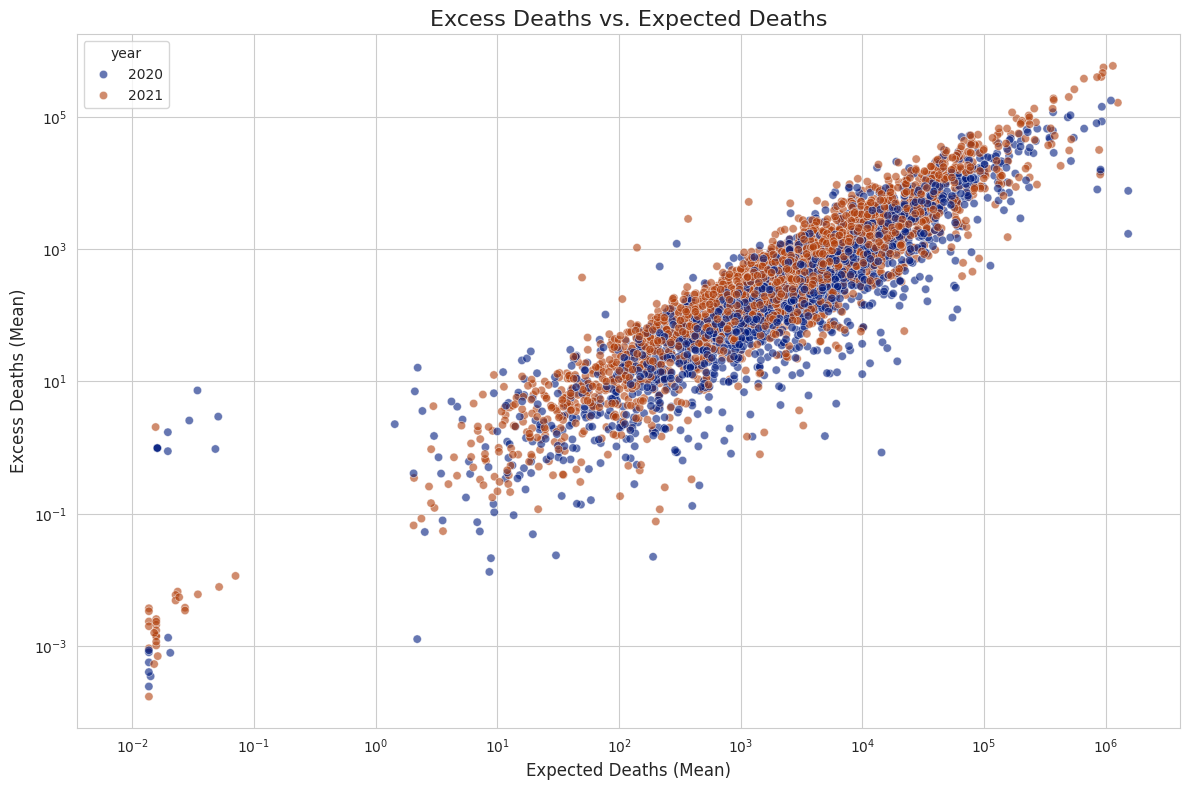

In [ ]:
# EDA 5.10: Excess Deaths vs. Expected Deaths (Scatter Plot)
print("\nGenerating EDA Plot 5.10: Scatter Plot of Excess vs. Expected Deaths...")
# This scatter plot helps to see if there is a correlation between the expected number of deaths and the excess deaths.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='expectedmean', y='excessmean', data=df, hue='year', palette='dark', alpha=0.6)
plt.title('Excess Deaths vs. Expected Deaths', fontsize=16)
plt.xlabel('Expected Deaths (Mean)', fontsize=12)
plt.ylabel('Excess Deaths (Mean)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig('scatter_excess_vs_expected.png')
plt.show()

#### **5.11. Stacked Bar Chart of Deaths by Age Group and Sex**

**Figure 11**: Stacked bar chart showing the composition of excess deaths by sex within each age group.

**Observation**: In almost every age group, the portion of the bar representing **males** is larger than that for **females**, confirming the **gender disparity** across different ages. The disparity appears most pronounced in the **middle and older age groups (45 and above)**.



Generating EDA Plot 5.11: Stacked Bar Chart by Age and Sex...


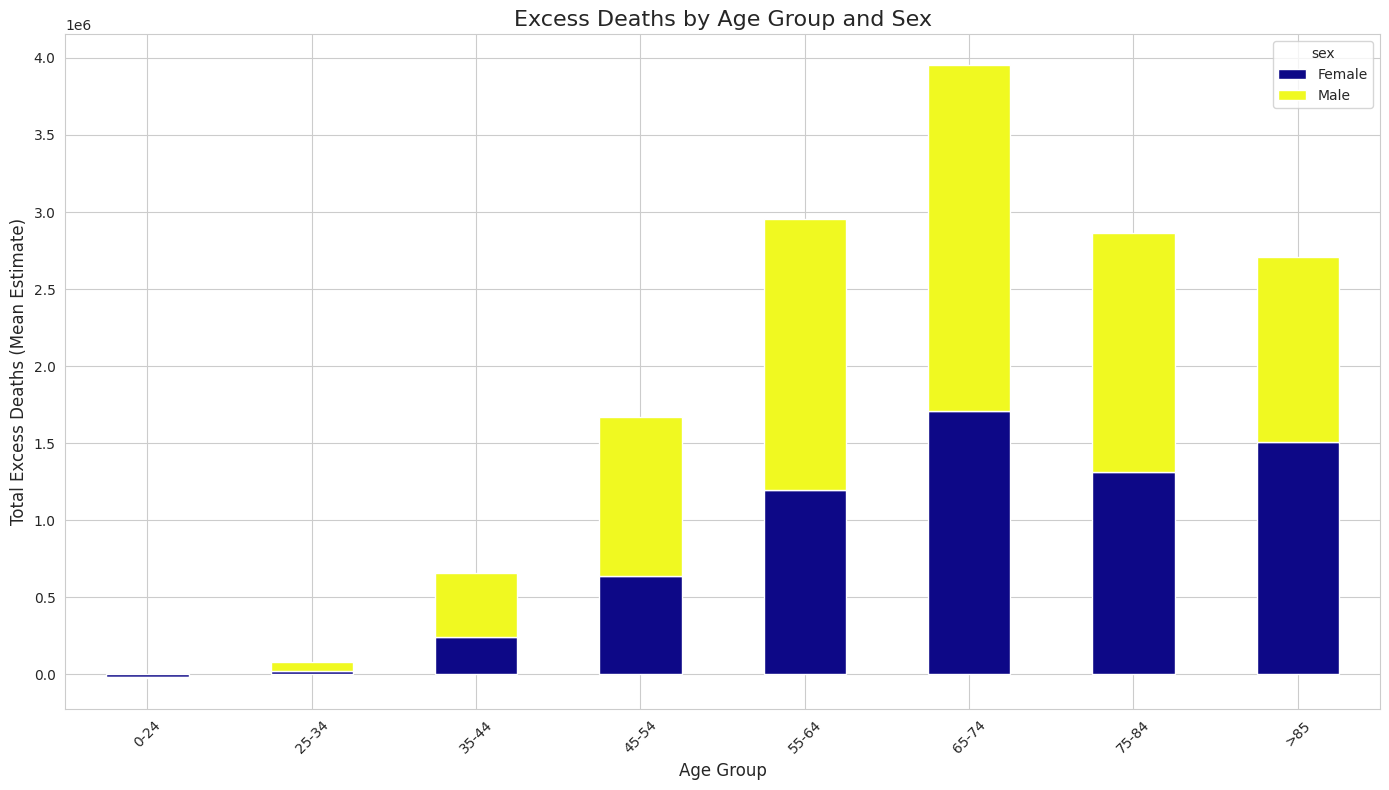

In [ ]:
# EDA 5.11: Stacked Bar Chart of Deaths by Age Group and Sex
print("\nGenerating EDA Plot 5.11: Stacked Bar Chart by Age and Sex...")
# This visualization breaks down the excess deaths by both age and sex, showing the composition within each age group.
age_sex_deaths = df[df['sex'] != 'Both'].groupby(['age_group', 'sex'])['excessmean'].sum().unstack()
age_sex_deaths.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='plasma')
plt.title('Excess Deaths by Age Group and Sex', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Excess Deaths (Mean Estimate)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('stacked_bar_age_sex.png')
plt.show()

#### **5.12. Point Plot of Excess Deaths by Age Group and Year**

**Figure 12**: Point plot comparing the average excess deaths across age groups for 2020 and 2021.

**Observation**: The line for **2021** is consistently above the line for **2020** across all age groups, indicating that the **average excess deaths** were **higher in the second year** of the pandemic for every age demographic. The **gap between the two years** widens significantly for the **older age groups**.



Generating EDA Plot 5.12: Point Plot of Excess Deaths by Age and Year...


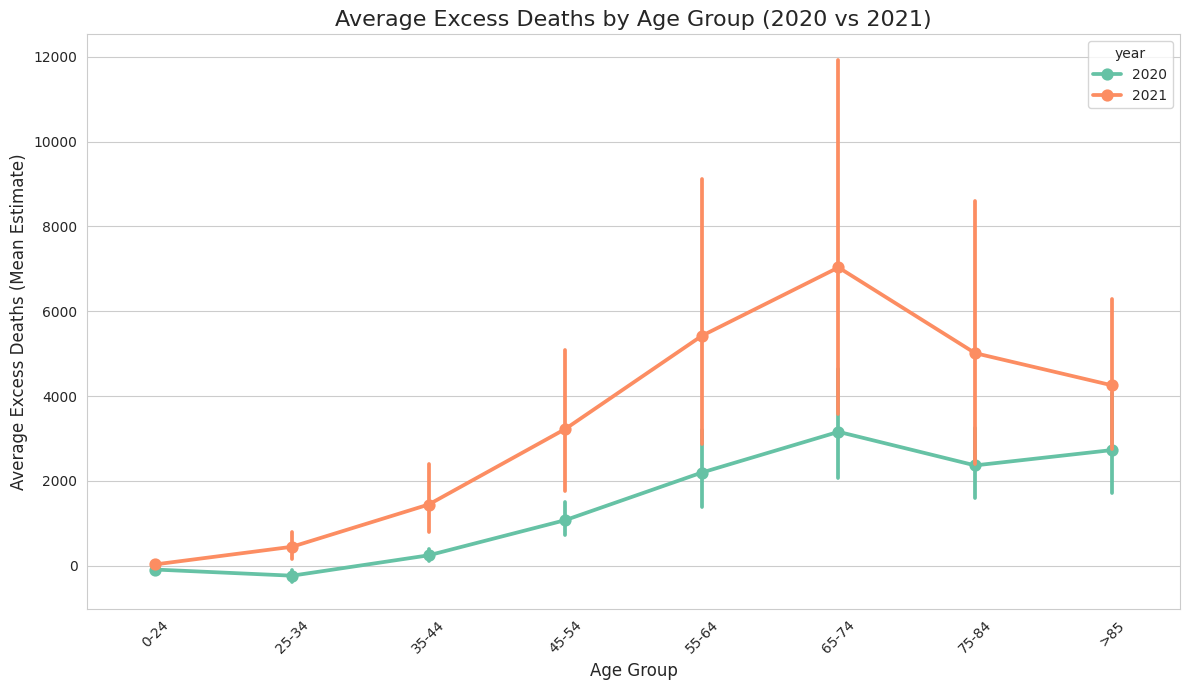

In [ ]:
# EDA 5.12: Point Plot of Excess Deaths by Age Group and Year
print("\nGenerating EDA Plot 5.12: Point Plot of Excess Deaths by Age and Year...")
# A point plot shows the mean of a quantitative variable for different categories, which is useful for comparisons.
# It helps to visualize how the average excess deaths changed from 2020 to 2021 for each age group.
# Note: 'age_order' should be defined from plot 5.4 for correct sorting.
plt.figure(figsize=(12, 7))
sns.pointplot(x='age_group', y='excessmean', hue='year', data=df, palette='Set2', order=age_order)
plt.title('Average Excess Deaths by Age Group (2020 vs 2021)', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Excess Deaths (Mean Estimate)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pointplot_age_year.png')
plt.show()

#### **5.13. Histogram of Excess Death Values**

**Figure 13**: Histogram showing the frequency distribution of non-zero excess death estimates.

**Observation**: The distribution is heavily **right-skewed**, with a large number of entries having **low excess death values** and a long tail of entries with **very high values**. The use of a **log scale** helps visualize this skew, confirming that while most data points represent **smaller numbers of excess deaths**, a few represent **extremely high mortality events**.



Generating EDA Plot 5.13: Histogram of Excess Death values...


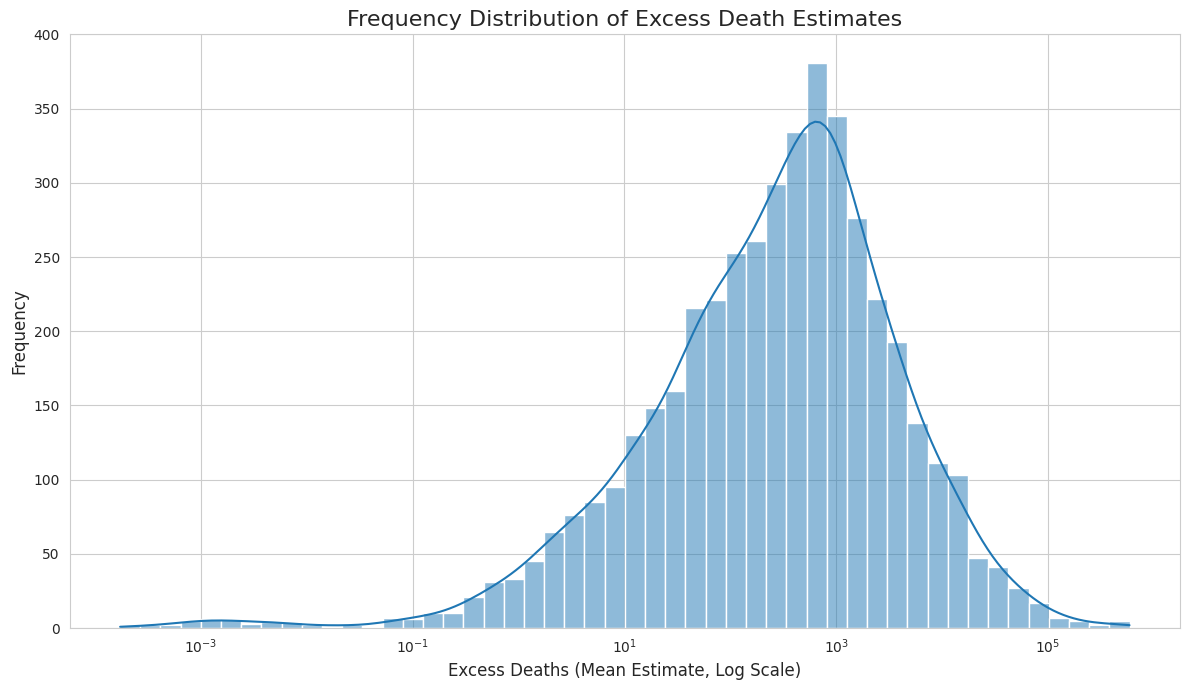

In [ ]:
# EDA 5.13: Histogram of Excess Death Values
print("\nGenerating EDA Plot 5.13: Histogram of Excess Death values...")
# A histogram shows the frequency distribution of a set of continuous data.
# This helps us understand the underlying distribution of the excess death estimates.
plt.figure(figsize=(12, 7))
# We filter out zero or negative values for a more meaningful log scale plot
sns.histplot(df[df['excessmean'] > 0]['excessmean'], bins=50, kde=True, log_scale=True)
plt.title('Frequency Distribution of Excess Death Estimates', fontsize=16)
plt.xlabel('Excess Deaths (Mean Estimate, Log Scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('histogram_excess_deaths.png')
plt.show()

#### **5.14. Bar Plot of Total All-Cause Mortality (ACM) by Year**

**Figure 14**: Bar chart showing the total estimated All-Cause Mortality for 2020 and 2021.

**Observation**: Similar to the excess deaths trend, the **total all-cause mortality** was **higher in 2021** than in 2020. This is expected, as the total mortality is the **sum of expected deaths and excess deaths**.



Generating EDA Plot 5.14: Bar Plot of ACM by Year...


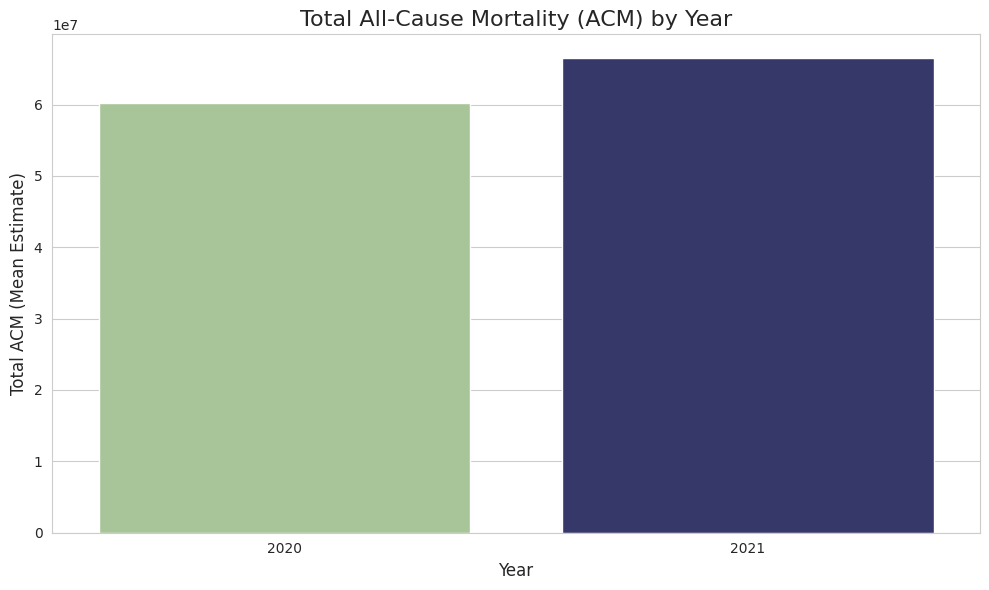

In [ ]:
# EDA 5.14: Bar Plot of Total Actual Cause Mortality (ACM) by Year
print("\nGenerating EDA Plot 5.14: Bar Plot of ACM by Year...")
# This shows the total estimated deaths from all causes, which includes both expected and excess deaths.
acm_by_year = df.groupby('year')['acmmean'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=acm_by_year.index, y=acm_by_year.values, palette='crest', hue=acm_by_year.index, legend=False)
plt.title('Total All-Cause Mortality (ACM) by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total ACM (Mean Estimate)', fontsize=12)
plt.tight_layout()
plt.savefig('barplot_acm_by_year.png')
plt.show()

#### **5.15. Top 10 Countries by Excess Deaths as a Percentage of their ACM**

**Figure 15**: Bar chart showing the 10 countries where excess deaths constituted the highest percentage of their total all-cause mortality.

**Observation**: This chart provides a **different perspective** on the pandemic's impact. Some countries on this list may not have had the **highest absolute number of deaths**, but experienced a very significant **relative increase in mortality**. This highlights nations where the pandemic had a **disproportionately large impact** on their overall death toll.



Generating EDA Plot 5.15: Top 10 Countries' Excess Deaths as % of ACM...


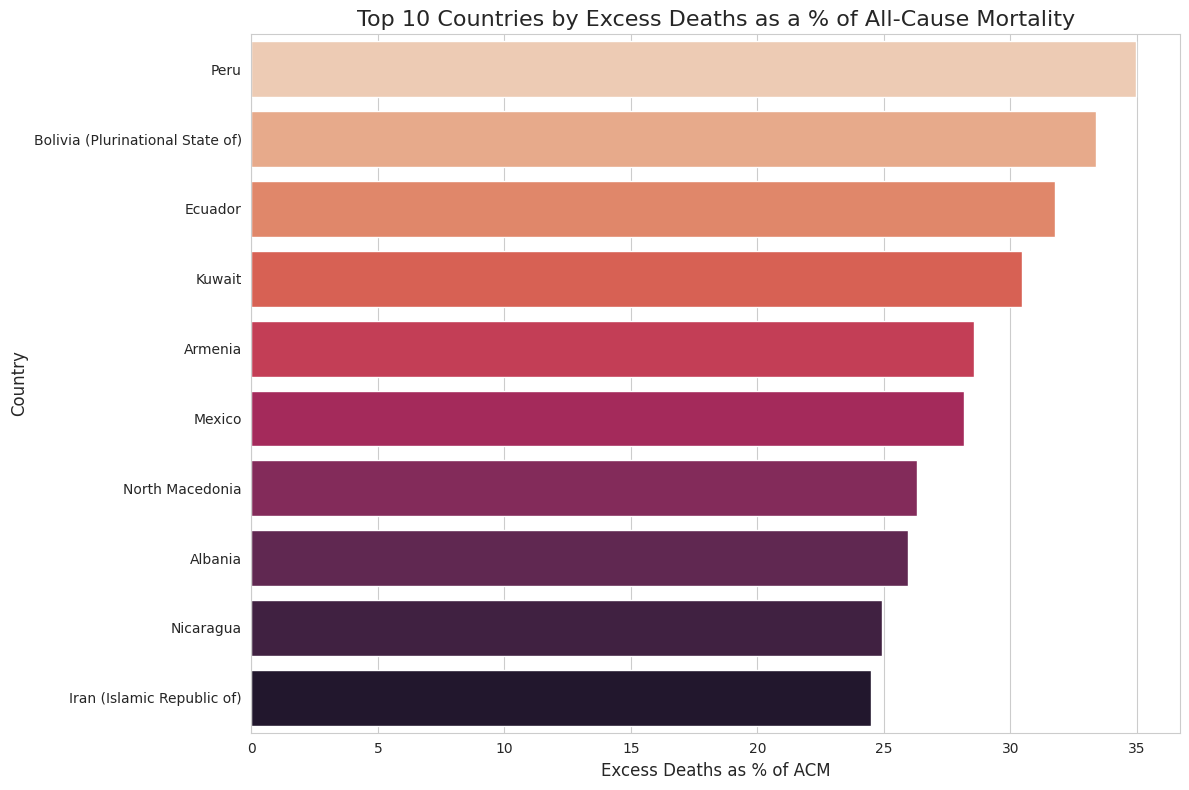

In [ ]:
# EDA 5.15: Top 10 Countries' Excess Deaths as a Percentage of their ACM
print("\nGenerating EDA Plot 5.15: Top 10 Countries' Excess Deaths as % of ACM...")
# This metric helps to understand the relative impact of the pandemic, not just the absolute numbers.
country_summary = df.groupby('country').agg({'excessmean': 'sum', 'acmmean': 'sum'}).reset_index()
# To avoid division by zero if acmmean is 0 for any country
country_summary = country_summary[country_summary['acmmean'] > 0]
country_summary['excess_as_pct_of_acm'] = (country_summary['excessmean'] / country_summary['acmmean']) * 100
top_10_pct = country_summary.sort_values(by='excess_as_pct_of_acm', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='excess_as_pct_of_acm', y='country', data=top_10_pct, palette='rocket_r', hue='country', legend=False)
plt.title('Top 10 Countries by Excess Deaths as a % of All-Cause Mortality', fontsize=16)
plt.xlabel('Excess Deaths as % of ACM', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig('barplot_top10_pct_acm.png')
plt.show()

#### **5.16. Strip Plot for Excess Deaths by Age Group**
**Figure 16:** Swarm plot showing the distribution of individual excess death estimates across age groups (based on a sample of 500 data points).

**Observation:** The swarm plot visually confirms the trend of increasing excess deaths with age. The density of points shifts upwards as age increases. It also clearly shows the wide range of estimates within each age category, with some very high outlier values present even in younger age groups.



Generating EDA Plot 5.16: Stripplot for Excess Deaths by Age Group...


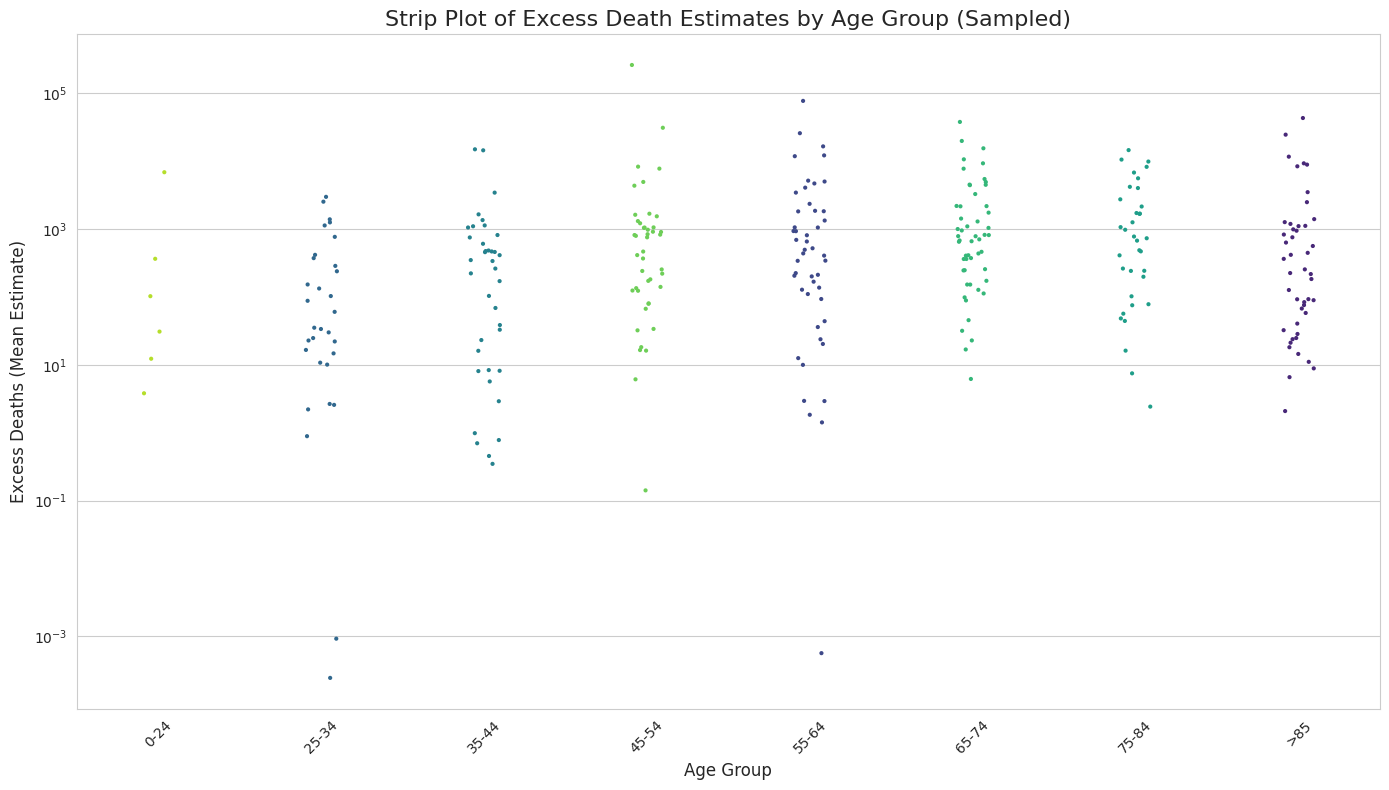

In [ ]:
# EDA 5.16: Swarm Plot for Excess Deaths by Age Group
print("\nGenerating EDA Plot 5.16: Stripplot for Excess Deaths by Age Group...")
# A swarm plot shows individual data points, which can be useful for seeing the density of points.
# We'll use a sample of the data to avoid overplotting, as swarm plots can be slow with large datasets.
df_sample = df[df['excessmean'] > 0].sample(n=300, random_state=1)  # reduced sample
plt.figure(figsize=(14, 8))
sns.stripplot(x='age_group', y='excessmean', data=df_sample, order=age_order, hue='age_group', palette='viridis', legend=False, size=3, jitter=True)
plt.title('Strip Plot of Excess Death Estimates by Age Group (Sampled)', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Excess Deaths (Mean Estimate)', fontsize=12)
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.savefig('stripplot_age_group.png')
plt.show()

#### **5.17 Global Heatmap of Excess Deaths**
**Figure 17:** World Heatmap of Total Cumulative Excess Deaths (2020–2021)

**Observation:** This world map provides a definitive global overview of the pandemic's cumulative toll. The color intensity, which is on a logarithmic scale to better visualize variations, clearly shows the epicenters of the crisis. North and South America, Europe, and South Asia (particularly India) are shaded in the darkest reds, indicating the highest concentration of excess deaths. In contrast, regions in Africa and Oceania show significantly lighter shading, reflecting lower estimated mortality. This single visualization encapsulates the geographic disparity of the pandemic's impact.


In [ ]:
print("\nGenerating Final EDA Plot: World Heatmap of Total Excess Deaths...")

import plotly.express as px
import numpy as np
import warnings

country_totals = df.groupby(['country', 'iso3'])['excessmean'].sum().reset_index()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)
    country_totals['log_excessmean'] = np.log10(country_totals['excessmean'].clip(lower=0) + 1)

fig = px.choropleth(country_totals,
                    locations="iso3",
                    color="log_excessmean",
                    hover_name="country",
                    hover_data={'iso3': False, 'log_excessmean': False, 'excessmean':':,.0f'},
                    color_continuous_scale="YlOrRd",
                    title="Global Heatmap of Total Excess Deaths (2020-2021)")

fig.update_layout(
    title=dict(x=0.5, font=dict(size=20)),
    coloraxis_colorbar=dict(
        title="Excess Deaths<br>(Log Scale)"
    )
)

fig.write_html("world_heatmap_excess_deaths.html")
print("Interactive heatmap saved to 'world_heatmap_excess_deaths.html'")

try:
    fig.write_image("world_heatmap_excess_deaths.png", scale=2)
    print("Static heatmap image saved to 'world_heatmap_excess_deaths.png'")
except ValueError as e:
    pass

fig.show()


Generating Final EDA Plot: World Heatmap of Total Excess Deaths...
Interactive heatmap saved to 'world_heatmap_excess_deaths.html'


### **6. SAVING THE CLEANED DATASET**

In [ ]:
# Finally, we save the cleaned and preprocessed DataFrame to a new CSV file.
# This file is a required submission item and will be used for the machine
# learning part of the project.

output_file_path = 'cleaned_who_excess_deaths.csv'
df.to_csv(output_file_path, index=False)

print(f"\n--- EDA Complete ---")
print(f"Cleaned dataset has been saved to '{output_file_path}'.")
print(f"The cleaned data has {df.shape[0]} rows and {df.shape[1]} columns.")


--- EDA Complete ---
Cleaned dataset has been saved to 'cleaned_who_excess_deaths.csv'.
The cleaned data has 6208 rows and 9 columns.


### **7. Outline of Proposed Machine Learning Algorithms**

Based on the insights from the Exploratory Data Analysis, the dataset is well-suited for a **regression task** to predict the number of excess deaths. The following machine learning algorithms are proposed for this purpose:

#### **7.1. Linear Regression**

- **Objective**: To establish a baseline model.
- **Method**: This model will be used to predict `excessmean` based on numerical features like `year` and one-hot encoded categorical features such as `country`, `sex`, and `age_group`.
- **Expected Outcome**: While likely too simple for the complexity of the data, it will provide a **benchmark** for evaluating more advanced models.

---

#### **7.2. Random Forest Regressor**

- **Objective**: To capture non-linear relationships and feature interactions.
- **Method**: As an **ensemble model**, Random Forest builds multiple decision trees and merges their results. It can handle the complexity of interactions between features like `country`, `age`, and `sex` more effectively than a linear model.
- **Expected Outcome**: This model is expected to provide a **much more accurate prediction** of `excessmean` and can also be used to determine **feature importance** (e.g., is `age_group` more predictive than `country`?).

---

#### **7.3. Gradient Boosting Regressor (e.g., XGBoost, LightGBM)**

- **Objective**: To achieve the highest predictive accuracy.
- **Method**: Gradient Boosting models build trees **sequentially**, where each new tree corrects the errors of the previous one. They are known for their **high performance and efficiency**.
- **Expected Outcome**: This is expected to be the **best-performing model**, capable of capturing the most intricate patterns in the data to deliver the most **precise predictions** for excess deaths.


**Created By:**<br>
**Name:** Pratham Agrawal<br>
**PRN:** 22070521078<br>
**Sem:** 7th<br>
**Sec:** C<br>